# Introduction to Probability - Problems

### In this notebook, we'll work through some classic probability problems. Some will be "easiest" to implement in python, while others are best done with pen & paper.

### Problem 1: The Birthday Problem

A classic calculation is to calculate the probability that two people in today's DSFP session share the same birthday. You can approximate the number of people in the room as n=40 (~35 students, ~3 guest instructions, 1 slightly overwhelmed postdoc, and 1 Northwestern faculty member).

### Problem 1a: Is it easier to calculate this probabiltiy directly or by some other method? Discuss with those around you. 

### Problem 1b: What is the probability that no two people in the room share the same birthday? 

### Problem 1c: Using your answer to 1b, plot the probability of two people sharing the same birthday as a function of the number of people in the room. At what value of n does the probability exceed 50%? Is this result surprising to you?

Hint: you may need the approximation that $(1 + x) \approx e^x$ for |x|<<1.

### Bonus Problem (to be completed in the lunch break): Find at least two DSFP attendees who share the same birthday. 

1a) It is easier to calculate as 1 - the probability that no two people share the same birthday. 

1b) this probability is (1 - 1/365) * (1-2/365), * (1-3/365), * ... $\approx$ $ e^{-((n*(n-1)/2)/365))}$ 

1c) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def birthday_probability(n):
    return np.exp(-((n*(n-1)/2)/365))

prob_list = []

n = 365

for k in np.linspace(0, 40, 39): 
    prob_list.append(birthday_probability(k))

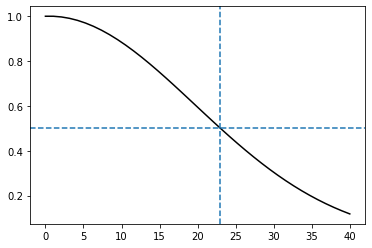

In [12]:
plt.plot(np.linspace(0, 40, 39), prob_list, color = 'black')
plt.axhline(0.5, 0, 40, ls = '--')
plt.axvline(23, 0, 1, ls = '--')

### [Pen & Paper] Problem 2: The Monty Hall Problem

Another classic problem comes from the Monty Hall gameshow. On this game show, contestants are first asked to pick between several doors. Behind one of the doors is a large prize (a car, dream vacation, etc.) while the contestant goes home empty handed if they pick either of the other doors. The gameshow host then opens one of the doors that does not contain the prize. 

Now the clever bit. The contestant is then asked if they want to change their original choice of door for the other closed door. Your task is to make this choice for them. Assume for this problem that the context picks a door labelled n=1 and that the prize is contained behind door n=k. 

### Problem 2a) Getting started: applying the Principle of Indifference

Before any doors are open, what is the conditional probability that the nth door contains a prize? 

$$ p(H_i | I) = 1/N $$

By the principle of indifference. 

### Problem 2b) Conditioning on data

Use the Bayes rule to write down the probability that the prize is behind the first door given observed doors $\{d_k\}$, k < n do not contain the prize. 

$$ p(H_1 | d_k, I) = \frac{p(d_k | H_1, I) p(H_1 | I)}{p(d_k | I)} $$

Then write down the probability that the kth door remains unopened given that $H_1$ is true.

$$ p(d_k | H_1, I) = \frac{1}{N-1} $$

### Problem 2c) Law of total probability 

Use the law of total probability to write down an expression for the probability of observing $\{d_k\}$ open doors (w/o) prizes.

$$ p(d_k | I) = \Sigma_{i=1}^N p(d_k | H_i, I) p(H_i | I) $$

### Problem 2d) The key idea

Write down the probability that the kth door stays unopened given that H_i = the hypothesis that the ith door contains the prize remains unopened. 

$$ p(d_k | H_i, I) =  \left\{
\begin{array}{ll}
      1 & \text{for k = i} \\
      0 & \text{otherwise} \\
\end{array} 
\right.  $$

except when i = 1. This is the important bit. This encodes that the game show host will not open a door that contains the prize until there are only two remaining doors. This means that the game show host (who knows which door contains the prize) is telling the contestant that the prize something about where the prize is. 

Then, using your answer to 2c), what is the probability of observing the first $\{d_k\}$ doors open w/o prizes?

$$ p(d_k | I) = \frac{1}{(N-1) N} + \frac{1}{N} = \frac{1}{N-1}$$

### Problem 2e) Should the contestant switch doors?

Combine your answer to 2b) and 2d) to give the probability that the prize is behind the first door. Then use the axioms of probability theory to compute the probability that the prize is behind the final (kth) door. Should the person switch?

Combining results, the probability that the prize is behind the initially chosen door is then $1/N$. And the law of total probability implies that the probability must be behind the last remaining door is 

$$ 1 - \frac{1}{N} = \frac{N-1}{N}$$

Larger by a factor of N-1. 

### Problem 3: Boolean Logic

An alternative interpretation of probability theory is that it represents an extension of classical logic to possibilities or plausibilities. In this sense, probability theory is a new kind of logic, and not statements about long run frequencies of events. In this problem, you'll explore the boolean logic that forms the basis for this perspective. While interesting for the development of probability theory, these are also useful skills for general programming tasks. 

We define the logical product and denote it by the symbol AB, which means that both propositions A and B are true. 

We define the logical sum and denote it by the symbol A + B, which means that at least one of the proopsitions A, or B is true. A + B = B + A. 

### Problem 3a) Generate two arrays, A and B, with randomly distributed numbers.

### Problem 3b) Create two arrays, one consisting of booleans when the value of the A array and B array are > 0.5 

### Problem 3c) Use the arrays from 3b) to create an array consisting only of the values in A where both A and B are greater than 0.5

### Problem 3d) Do the same, except for where either A or B are greater than 0.5. 

## Problem 4: Probability Transformations in Astronomy

This example comes from the AstroML book, and is a famous example of where a common transformation in astronomy does not preserve all of the properties of the underlying distribution. 

### Problem 4a) Generate some underlying normally distributed flux data

Hint: you can do this most easily with scipy.stats.norm(), norm.rvs. Your life in 4d) will be slightly easier if you generate an odd number of samples.

### Problem 4b) Transform fluxes to magnitudes

The magnitude of a source is defined as mag $= -2.5 \log_{10}(F)$. transform your normally distributed flux data to magnitudes. 

### Problem 4c) Plot your results

Plot the flux and magnitude distribution. How has the transformation changed the shape of the distribution?

### Problem 4d) Cumulative Distribution Function

Plot the CDF of each distribution and discuss the properties of the CDF. Then compute the 25th, 50th, and 75th percentiles of both distributions and determine what data point each maps to. The CDF, median, and percentiles form the basis for many statistical tests of distribution similarity.

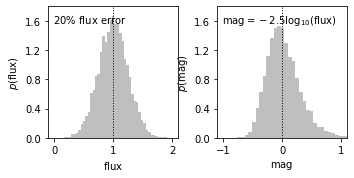

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 7.000e+00, 1.600e+01, 4.600e+01, 8.500e+01, 1.640e+02,
        2.990e+02, 4.890e+02, 8.160e+02, 1.239e+03, 1.788e+03, 2.533e+03,
        3.370e+03, 4.298e+03, 5.304e+03, 6.273e+03, 7.165e+03, 7.939e+03,
        8.555e+03, 9.031e+03, 9.345e+03, 9.619e+03, 9.787e+03, 9.895e+03,
        9.943e+03, 9.967e+03, 9.984e+03, 9.991e+03, 9.996e+03, 9.999e+03,
        1.000e+04]),
 array([-1.        , -0.93877551, -0.87755102, -0.81632653, -0.75510204,
        -0.69387755, -0.63265306, -0.57142857, -0.51020408, -0.44897959,
        -0.3877551 , -0.32653061, -0.26530612, -0.20408163, -0.14285714,
        -0.08163265, -0.02040816,  0.04081633,  0.10204082,  0.16326531,
         0.2244898 ,  0.28571429,  0.34693878,  0.40816327,  0.46938776,
         0.53061224,  

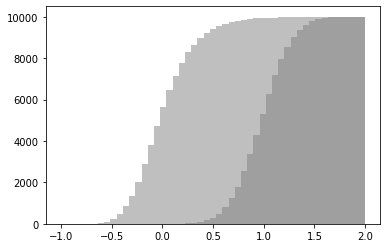

In [18]:
# Solution heavily based on the one given by Jake VanderPlas as part of the astroml documentation


import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm


#------------------------------------------------------------
# Create our data

# generate 10000 normally distributed points
np.random.seed(1)
dist = norm(1, 0.25)
flux = dist.rvs(10001)
flux_fit = np.linspace(0.001, 2, 1000)
pdf_flux_fit = dist.pdf(flux_fit)
cdf_flux_fit = dist.cdf(flux_fit)

# transform this distribution into magnitude space
mag = -2.5 * np.log10(flux)
mag_fit = -2.5 * np.log10(flux_fit)



#------------------------------------------------------------
# Plot the result
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.17, top=0.9,
                    left=0.12, right=0.95, wspace=0.3)

# first plot the flux distribution
ax = fig.add_subplot(121)
ax.hist(flux, bins=np.linspace(0, 2, 50),
        histtype='stepfilled', fc='gray', alpha=0.5, density=True)
ax.plot([1, 1], [0, 2], ':k', lw=1)
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(0, 1.8)

ax.set_xlabel(r'${\rm flux}$')
ax.set_ylabel(r'$p({\rm flux})$')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
ax.text(0.04, 0.95, r'${\rm 20\%\ flux\ error}$',
        ha='left', va='top', transform=ax.transAxes)

# next plot the magnitude distribution
ax = fig.add_subplot(122)
ax.hist(mag, bins=np.linspace(-1, 2, 50),
        histtype='stepfilled', fc='gray', alpha=0.5, density=True)
ax.plot([0, 0], [0, 2], ':k', lw=1)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(0, 1.8)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
ax.text(0.04, 0.95, r'${\rm mag} = -2.5\log_{10}({\rm flux})$',
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'${\rm mag}$')
ax.set_ylabel(r'$p({\rm mag})$')

plt.show()

plt.hist(mag, bins=np.linspace(-1, 2, 50),
        histtype='stepfilled', fc='gray', alpha=0.5, cumulative = True)

plt.hist(flux, bins=np.linspace(-1, 2, 50),
        histtype='stepfilled', fc='gray', alpha=0.5, cumulative = True)

In [19]:
np.where(flux == np.median(flux))

(array([1341]),)

In [20]:
np.where(mag == np.median(mag))

(array([1341]),)

In [17]:
mag[mag == np.median(mag)]

array([], dtype=float64)

### Challenge Problem: From where does randomness come from?

As astronomers, we know that there are two exclusively correct theories of nature. Classical mechanics and general relativity and no others. Given that both of these theories are deterministic, from where does randomnness come from? 

One way that people have approached this question is by positing that randomness (or probability) are empirical facts - something we see in the behaivor of a rolled die or a flipped coin. In fact, if we flip a coin a large number of times, it does approach a 1/2 H 1/2 T distribution. 

This has never quite made sense to me. We assume that both outcomes are equally likely based on the principle of indifference. But a coin is not in an indifferent starting state - one side is typically face up before you flip it. How can we explain the equally likely outcomes?

Start by writing down the equations of motion for the coin as it moves through the air (and rotates). Once you have done that, plot the 'pre-image' (space of initial conditions) that lead to H and T outcomes. Explain why coins have a 1/2 H and 1/2 T long-run distribution and speculate on the origin of randomness. 